# Cloud Segmentation EDA 

In [1]:
# load libraries
import utils 
import pandas
import matplotlib.pyplot as plt 
import cv2 
from os import listdir 
from os.path import join
import numpy as np

train_labels = pandas.read_csv(utils.TRAIN_LABELS)
image_list = sorted(listdir(utils.TRAIN_IMAGES))


The training labels consist of n * 4 labels, where n is the number of training images

In [2]:
label_first = train_labels[:utils.N_CLASSES] 
label_first

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN


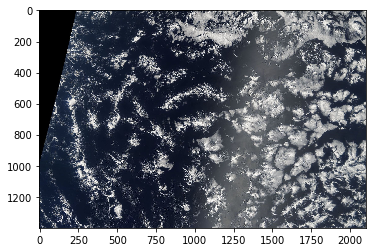

In [3]:
image_first = cv2.imread(join(utils.TRAIN_IMAGES, image_list[0]))
image_first = cv2.cvtColor(image_first, cv2.COLOR_BGR2RGB)
plt.imshow(image_first)
plt.show()

In [4]:
print("Image shape:", image_first.shape)

Image shape: (1400, 2100, 3)


In [5]:
encoded_label = label_first['EncodedPixels'][0]
encoded_label

'264918 937 266318 937 267718 937 269118 937 270518 937 271918 937 273318 937 274718 937 276118 937 277518 937 278918 937 280318 937 281718 937 283118 937 284518 937 285918 937 287318 937 288718 937 290118 937 291518 937 292918 937 294318 937 295718 937 297118 937 298518 937 299918 937 301318 937 302718 937 304118 937 305518 937 306918 937 308318 937 309718 937 311118 937 312518 937 313918 937 315318 937 316718 937 318118 937 319518 937 320918 937 322318 937 323718 937 325118 937 326518 937 327918 937 329318 937 330718 937 332118 937 333518 937 334918 937 336318 937 337718 937 339118 937 340518 937 341918 937 343318 937 344718 937 346118 937 347518 937 348918 937 350318 937 351718 937 353118 937 354518 937 355918 937 357318 937 358718 937 360118 937 361518 937 362918 937 364318 937 365718 937 367118 937 368518 937 369918 937 371318 937 372718 937 374118 937 375518 937 376918 937 378318 937 379718 937 381118 937 382518 937 383918 937 385318 937 386718 937 388118 937 389518 937 390918 93

In [6]:
# let's convert the enconded label into a numpy array 
encoded_pixels = np.array([]).astype(np.int32)
encoded_lengths = np.array([]).astype(np.int32)
tmp_list = encoded_label.split(' ')
for i in range(0, len(tmp_list), 2):
    encoded_pixels = np.append(encoded_pixels, int(tmp_list[i]))
    encoded_lengths = np.append(encoded_lengths, int(tmp_list[i + 1]))
    


In [7]:
print("N_encoded_pixels:", encoded_pixels.shape[0])
print("Max_pixel:", encoded_pixels.max())
print("Max_length:", encoded_lengths.max())


N_encoded_pixels: 998
Max_pixel: 1656518
Max_length: 937


The following is a mask of the image segmentation

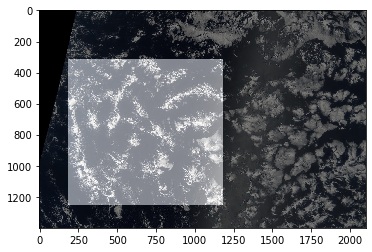

In [8]:
plt.imshow(image_first)
mask = utils.rle2mask(encoded_label, (image_first.shape[0], image_first.shape[1]))
plt.imshow(mask, alpha=0.5, cmap='gray')
plt.show()